### Explorations

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
pi2 = (np.pi / 2.0)
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        
        return sigm * (1. - sigm)
    return sigm

def abs_arctan_inv(value):
    return (pi2 - abs(np.arctan(value))) / pi2

def abs_arctan(value):
    return (abs(np.arctan(value))) / pi2

In [100]:
interval = np.arange(-10., 10., 0.1)
angles_graus = np.arange(0.0, 360)
radians = np.radians(angles_graus)
altura = np.arange(0,100)

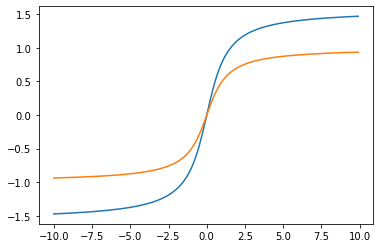

In [83]:
plt.plot(interval, np.arctan(interval))
plt.plot(interval, np.arctan(interval)/pi2)
#plt.plot(interval, np.tanh(interval))
_ = plt.ylim()

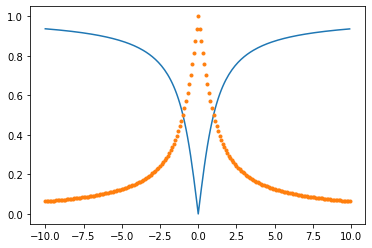

In [93]:
plt.plot(interval, abs_arctan(interval))
plt.plot(interval, abs_arctan_inv(interval),".")

### Corrigir velocidades angulares

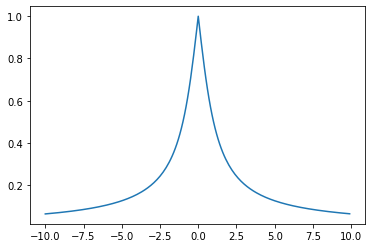

In [89]:

%matplotlib inline
 
plt.plot(interval, abs_arctan_inv(interval) )
_ = plt.ylim()

### Corrigir angulos de Euler

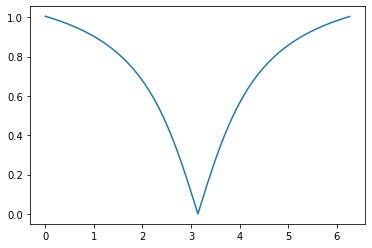

In [87]:

%matplotlib inline
 
plt.plot(radians, abs_arctan(radians - np.pi) * 1.25 )
_ = plt.ylim()

### Altura em Z

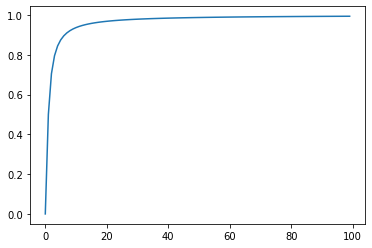

In [97]:
plt.plot(altura, abs_arctan(altura))

### variaçao em x ou y

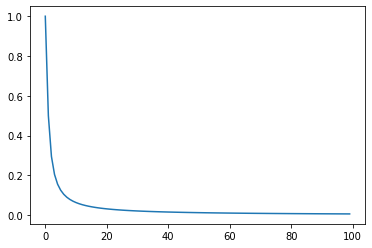

In [99]:
plt.plot(altura, abs_arctan_inv(altura))

### Speed

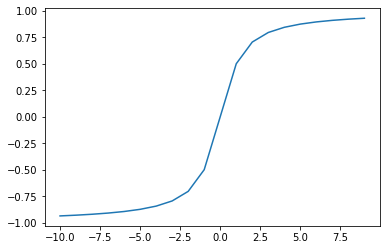

In [115]:
speed = np.arange(-10, 10)
plt.plot(speed, np.arctan(speed)/pi2)

7


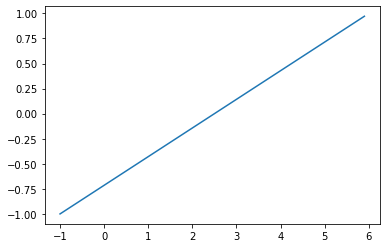

In [120]:
min_r = -1
max_r = 6
delta = max_r - min_r
print(delta)
r = np.arange(min_r, max_r, 0.1)
plt.plot(r, (r + abs(min_r) - delta/2) / (delta/2) )

### Heat map 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R
    
start_pos = np.array([0., 10.])
target_pos = np.array([0., 20.])
delta = target_pos - start_pos

def reward_function_o(p, t):
    if p[1] < start_pos[1]:
        return - 1
    if(p[1] > t[1]):
        return (-1 * 0.3 * (p[1] - target_pos[1])) / delta[1]
    
    return (p[1] - start_pos[1] - 3 * np.sqrt(abs(p[0] - t[0])))/delta[1]
    
def reward_function(p, t):
    return np.tanh(1 - 0.003 * (abs(p - t))).sum()
    
resolution = 200

def make_range(start, end, resolution):
    delta = end - start
    steps = delta/resolution
    return np.round(np.arange(start, end, steps), 2)

x_range = make_range(-10.0, 10.0, resolution)
z_range = make_range(40.0, 0.0, resolution)

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
_ = plt.ylim()